# Importing modules for the Project

In [435]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

# Loading the training and testing data and getting the summary statistics

In [478]:
X_train = pd.read_excel("Data.xlsx",dtype = float).round(3)

In [479]:
X_train.iloc[0,-1]

11397.938

In [480]:
X_test = pd.read_excel("Test_Data.xlsx").round(3)

In [481]:
X_train.describe()

,DEPTH(ft),ROP(ft/h),GR,"UUCS, psi"
count,2059.000000,2058.000000,2058.000000,2058.000000
mean,5946.231423,65.967567,37.940753,6187.362523
std,849.574132,17.610812,21.989722,3054.606491
min,0.000000,0.000000,0.000000,0.000000
25%,5209.500000,48.889000,17.628000,3877.845250
50%,5962.500000,69.976500,35.857500,5238.697500
75%,6670.750000,77.744750,56.015750,9004.235500
max,7425.000000,108.348000,107.137000,12640.002000


In [482]:
X_train.head()

,DEPTH(ft),ROP(ft/h),GR,"UUCS, psi"
0,4507.0,35.003,23.500,11397.938
1,4507.5,35.188,23.521,11393.243
2,4509.0,35.611,24.030,11372.686
3,4509.5,35.712,24.151,11369.645
4,4510.0,35.792,24.259,11367.988


In [483]:
X_test.describe()

,DEPTH(ft),ROP(ft/h),GR,"UCS, psi"
count,870.000000,870.000000,870.000000,870.000000
mean,5946.576437,65.896199,37.264670,6271.102472
std,830.102080,16.983532,22.161739,3062.095747
min,4508.000000,35.245000,7.720000,1165.788000
25%,5272.750000,49.150000,16.883250,3872.439000
50%,5921.500000,69.263000,34.295000,5310.118000
75%,6618.250000,78.221500,55.840000,9053.518500
max,7424.000000,107.312000,101.454000,12640.002000


In [484]:
X_train.shape

(2066, 4)

In [485]:
X_test.shape

(870, 4)

In [486]:
X_train = X_train.dropna()

In [487]:
X_train.isnull().count()

DEPTH(ft)    2058
ROP(ft/h)    2058
GR           2058
UUCS, psi    2058
dtype: int64

In [488]:
X_train.describe()

,DEPTH(ft),ROP(ft/h),GR,"UUCS, psi"
count,2058.000000,2058.000000,2058.000000,2058.000000
mean,5946.919825,65.967567,37.940753,6187.362523
std,849.206020,17.610812,21.989722,3054.606491
min,0.000000,0.000000,0.000000,0.000000
25%,5211.000000,48.889000,17.628000,3877.845250
50%,5964.000000,69.976500,35.857500,5238.697500
75%,6670.875000,77.744750,56.015750,9004.235500
max,7425.000000,108.348000,107.137000,12640.002000


In [489]:
X_train.corr()

,DEPTH(ft),ROP(ft/h),GR,"UUCS, psi"
DEPTH(ft),1.000000,-0.403576,0.251658,0.008050
ROP(ft/h),-0.403576,1.000000,0.030225,0.146338
GR,0.251658,0.030225,1.000000,-0.381721
"UUCS, psi",0.008050,0.146338,-0.381721,1.000000


<Figure size 3600x3600 with 0 Axes>

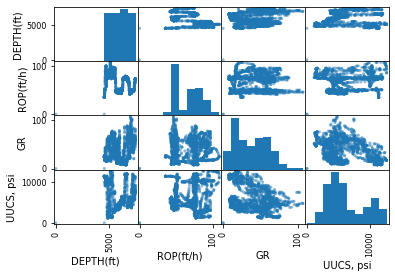

In [490]:
# this  is a scatter matrix of the features of the training data to see the visual relationships between features
plt.figure(figsize=(50,50))
figure = pd.plotting.scatter_matrix(X_train)
plt.savefig("EDA_plot1.pdf")
plt.show()

### Various correlation types
pearson, spearman and kendall.
Helps check for collinearity

In [491]:
def correlation_heatmap(data,method):
  # a function to print out all necessary graphs and correlations out
  plt.figure(figsize = (5,5))
  corr = data.corr(method)
  corr_plot = sns.heatmap(corr,annot=True)
  plt.savefig(f"{method}.pdf")
  plt.show()
  return corr[corr > 0.6]

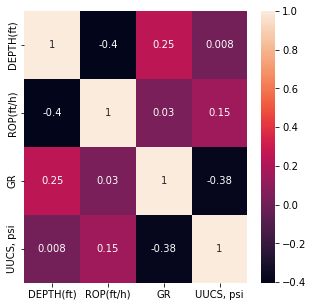

,DEPTH(ft),ROP(ft/h),GR,"UUCS, psi"
DEPTH(ft),1.0,NaN,NaN,NaN
ROP(ft/h),NaN,1.0,NaN,NaN
GR,NaN,NaN,1.0,NaN
"UUCS, psi",NaN,NaN,NaN,1.0


In [492]:
pearson = correlation_heatmap(X_train, 'pearson')
pearson

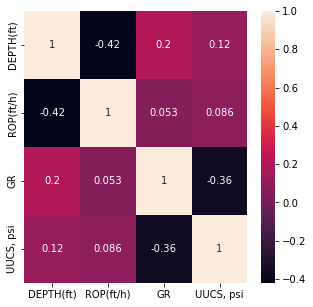

,DEPTH(ft),ROP(ft/h),GR,"UUCS, psi"
DEPTH(ft),1.0,NaN,NaN,NaN
ROP(ft/h),NaN,1.0,NaN,NaN
GR,NaN,NaN,1.0,NaN
"UUCS, psi",NaN,NaN,NaN,1.0


In [493]:
spearman = correlation_heatmap(X_train, 'spearman')
spearman

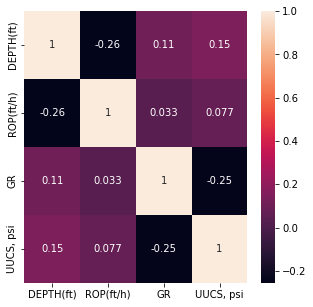

In [494]:
kendall = correlation_heatmap(X_train, 'kendall')

In [495]:
X_train.columns

Index(['DEPTH(ft)', 'ROP(ft/h)', 'GR', 'UUCS, psi'], dtype='object')

In [496]:
X =X_train.drop(['UUCS, psi'], axis=1)
y = X_train['UUCS, psi']
column_names = X.columns

In [497]:
# calculating VIF
# There's a Scipy API for doing this but I didn'tknow so I just looked up the formula and built it in myself.
from sklearn.linear_model import LinearRegression
def VIF (X):
  #the function is to take in X and iteratively drop that column and perform a regression and then use it to calculate VIF
  #First it to get all colums of X and initialize some empty list
  r2_score = []
  VIF = []
  columns = X.columns

  # instantiate Linear regression
  lr= LinearRegression()

  #Now the next step is to drop the current variable using a loop and use it as the predictor and append r2 score
  for i in columns:
    #okay so this drops the particular column and then uses that column as a predictor
    lr.fit(X.drop([i],axis=1),X.loc[:,i])

    #the r2 score is appended to the list.
    r2_score.append(lr.score(X.drop([i],axis=1),X.loc[:,i]))

  #now I am going to append use the r2 score to try and append the VIF calculations to the list.
  VIF = [1/1-x if x < 1 else float("inf") for x in r2_score ]

  for index, item in enumerate(VIF):
    print(f" Column dropped : {index}, VIF: {item}")


VIF(X)


 Column dropped : 0, VIF: 0.7674425256935459
 Column dropped : 1, VIF: 0.8185838599112049
 Column dropped : 2, VIF: 0.9159208240997889


# Preprocessing 

In [498]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Normalizing the data set before splitting
X = scaler.fit_transform(X)

Min_values = scaler.data_min_
Max_values = scaler.data_max_
print(Min_values, Max_values)
X

[0. 0. 0.] [7425.     108.348  107.137]


array([[0.60700337, 0.32306088, 0.21934532],
       [0.60707071, 0.32476834, 0.21954133],
       [0.60727273, 0.32867243, 0.22429226],
       ...,
       [0.9993266 , 0.66906634, 0.53604264],
       [0.99959596, 0.67057998, 0.48960677],
       [1.        , 0.67223207, 0.53249578]])

In [499]:
# Transforming the X_test with the min and max values of the train to keep distribution constant
y_test = X_test['UCS, psi']
X_test = X_test.drop(['UCS, psi'], axis=1)
X_test = scaler.transform(X_test)

In [500]:
# Splitting X,y into training and validation data and later test on the test data.
X_train, X_val,y_train, y_val = train_test_split(X,y.round(3), random_state=47, train_size = 0.9)

In [501]:
# a function that returns the metrics of the data respectively as shown
# MSE = Mean squared Error
# MAE = Mean absolute error
def training(model,X_train,y_train, X_test, y_test):
  from sklearn.metrics import mean_squared_error, mean_absolute_error

  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  train_mse = mean_squared_error(y_train, train_pred)
  test_mse = mean_squared_error(y_test, test_pred)
  train_mae = mean_absolute_error(y_train, train_pred)
  test_mae = mean_absolute_error(y_test, test_pred)
  return train_score, test_score, train_mse, test_mse, train_mae, test_mae

In [502]:
#testing the data on base model
from xgboost import XGBRegressor
model= XGBRegressor()
first_xgboost= training(model.fit(X_train, y_train), X_train, y_train, X_val, y_val)

In [503]:
# base model performed well but has high error mse and mae
# looks like a simple function can learn but is not easily reproducible if computation power differs.
# High MSE and MAE stemming from trying to predict about 8-9 significant figures in the original test data.
first_xgboost

(0.9996384466986613,
 0.9942904875194063,
 3347.2870717937913,
 56678.51974645673,
 37.85104221472936,
 134.16050190116363)

In [504]:
# a function that aims to return and compare the values of actual data vs predicted data
def actual_vs_predicted_dataframe (y_true,y_pred):
  """Takes Y_true: Actual values of the data and y_pred : model predicted values and puts them into a data frame"""
  import pandas as pd
  #puts the arguments into a dictionary
  values = {'Y_true': y_true.values , 'Y_pred': y_pred}

  #uses the values dictionary to create a dataframe and passes the length of the y_true as index
  df = pd.DataFrame(values, index =[x for x in range(len(y_true))])

  #returns dataframe
  return df

In [505]:
Xgboost_train_values = actual_vs_predicted_dataframe(y_train, model.fit(X_train,y_train.round(3)).predict(X_train)).round(3)

In [506]:
#looking at the train values and seeing how okay it is doing.
Xgboost_train_values

,Y_true,Y_pred
0,6072.321,6063.912109
1,5867.319,5687.166016
2,7383.593,7314.824219
3,5069.912,5123.664062
4,2762.859,2715.813965
...,...,...
1847,3900.203,3878.041992
1848,3249.966,3221.791992
1849,7148.852,7153.456055
1850,7619.839,7509.849121


In [532]:
Xgboost_test_values = actual_vs_predicted_dataframe(y_test, model.fit(X_train,y_train).predict(X_test))

In [533]:
# checking X_test values
Xgboost_test_values

,Y_true,Y_pred
0,11386.519,11364.787109
1,11370.463,11367.207031
2,11369.208,11367.207031
3,11362.234,11352.417969
4,11357.741,11360.998047
...,...,...
865,7074.763,7472.838379
866,8300.325,8216.065430
867,8887.807,8723.491211
868,9121.223,9124.292969


In [507]:
#using random search.
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Create the XGBoost regressor
xgb = XGBRegressor()

# Random search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='r2',  # Scoring metric
    cv=5,  # Number of folds in cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found:", best_params)
print("Best R^2 score found:", best_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best R^2 score found: 0.981087874622111


In [508]:
# checking the params found with cross validation 5-fold cross validation
#  random_search.best_score_ is a dictionary of the best params found.
from sklearn.model_selection import cross_val_score
tuned_model = XGBRegressor(subsample = random_search.best_params_['subsample'], n_estimators = random_search.best_params_['n_estimators'],
                          min_child_weight= random_search.best_params_['min_child_weight'], max_depth = random_search.best_params_['max_depth'],
                          learning_rate = random_search.best_params_['learning_rate'], gamma = random_search.best_params_['gamma'],
                          colsample_bytree = random_search.best_params_['colsample_bytree'])

In [509]:
scoring = cross_val_score(tuned_model, X_train, y_train, cv = 5)
#scores from cross validation
scoring

array([0.98953481, 0.9824875 , 0.95585544, 0.98793213, 0.9896295 ])

In [510]:
training(tuned_model.fit(X_train, y_train),X_train,y_train, X_val, y_val)

(0.9980802793576878,
 0.9866670197724328,
 17772.914985633055,
 132356.93689712381,
 91.47697899652402,
 196.21908126801424)

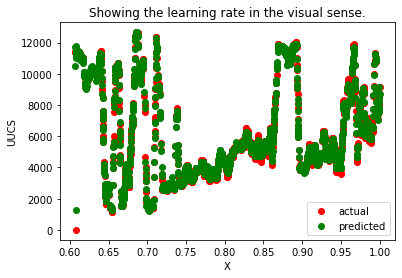

In [537]:
plt.title("Showing the learning rate in the visual sense.")
plt.scatter(X_train[:,0],y_train, c = 'red', label = 'actual')
plt.scatter(X_train[:,0], tuned_model.fit(X_train,y_train).predict(X_train), c='green', label = 'predicted')
plt.xlabel("X")
plt.ylabel("UUCS")
plt.legend()
plt.show()

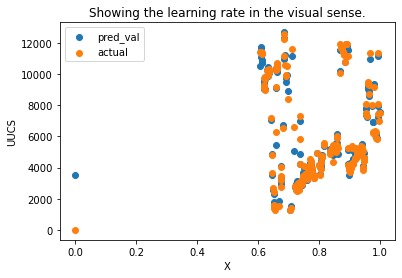

In [538]:
plt.title("Showing the learning rate in the visual sense.")
plt.scatter(X_val[:,0],tuned_model.fit(X_train, y_train).predict(X_val), label= "pred_val" )
plt.scatter(X_val[:,0],y_val, label = 'actual' )
plt.xlabel("X")
plt.ylabel("UUCS")
plt.legend()
plt.show()

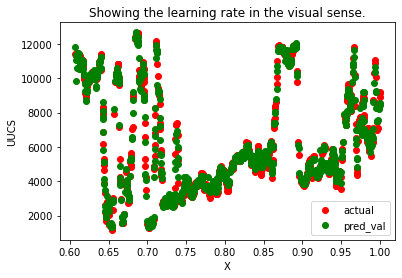

In [536]:
plt.title("Showing the learning rate in the visual sense.")
plt.scatter(X_test[:,0],y_test, c = 'red', label = 'actual')
plt.scatter(X_test[:,0], tuned_model.fit(X_train,y_train).predict(X_test), c='green', label = 'pred_val')
plt.xlabel("X")
plt.ylabel("UUCS")
plt.legend()
plt.show()

In [513]:
!pip install pyswarms

In [514]:
import pyswarms as ps
from pyswarm import pso

In [515]:
from pyswarm import pso

# Define the objective function
def objective_function(params, X_train, y_train, X_val, y_val):
    learning_rate, max_depth, min_child_weight, subsample = params
    
    # Create an XGBoost regressor with the specified hyperparameters
    model = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_child_weight=min_child_weight,
        subsample=subsample,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Compute the mean squared error
    mse = mean_squared_error(y_val, y_pred)
    
    # Return the mean squared error as the objective value
    return mse

# Define the bounds for each hyperparameter
lb = [0.01, 1, 1, 0.1]  # Lower bounds for learning_rate, max_depth, min_child_weight, subsample
ub = [0.3, 10, 10, 1]  # Upper bounds for learning_rate, max_depth, min_child_weight, subsample

# Perform PSO optimization using LocalBestPSO
best_params, _ = pso(objective_function, lb, ub, args=(X_train, y_train, X_val, y_val), swarmsize=10, maxiter=50)

# Extract the best hyperparameters
learning_rate, max_depth, min_child_weight, subsample = best_params

# Create the final XGBoost regressor with the best hyperparameters
final_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=learning_rate,
    max_depth=int(max_depth),
    min_child_weight=min_child_weight,
    subsample=subsample,
    random_state=42
)

# Train the final model
final_model.fit(X_train, y_train)

# Evaluate the final model
mse = mean_squared_error(y_test, final_model.predict(X_test))
print("Final Mean Squared Error:", mse)
# Extract the best hyperparameters
# learning_rate, max_depth, min_child_weight, subsample = best_params

# Now you have the best hyperparameters in learning_rate, max_depth, etc.


Stopping search: maximum iterations reached --> 50
Final Mean Squared Error: 47470.689354134236


In [ ]:
#Pso model doing better than random search

In [518]:
print(final_model.score(X_train,y_train))
print(final_model.score(X_test,y_test))

0.9999393042768367
0.9949314062708519


In [402]:
tuned_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [403]:
tuned_model.score(X_test,y_test)

0.99064750720989

In [404]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [405]:
model.score(X_test,y_test)

0.9918189056838786

In [407]:
training(model.fit(X_train, y_train), X_train, y_train, X_test, y_test)

(0.9996384466986613,
 0.9918189056838786,
 3347.2870717937913,
 76621.28937738763,
 37.85104221472936,
 145.81899465135598)

In [408]:
training(tuned_model.fit(X_train, y_train), X_train, y_train, X_test, y_test)

(0.9980802793576878,
 0.99064750720989,
 17772.914985633055,
 87592.2008451659,
 91.47697899652402,
 197.02367583961927)

(0.16504306428677962,
 0.14408739635891954,
 7730092.758299899,
 8016180.323957996,
 2142.1273322842226,
 2202.3073593216577)

# SVM

In [519]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train,y_train)

SVR()

In [520]:
training(svm.fit(X_train, y_train), X_train, y_train, X_val, y_val)

(-0.05918877252450816,
 -0.07689052381072914,
 9806047.605521578,
 10690327.944117477,
 2409.9358187495122,
 2556.336429684761)

In [521]:
training(svm.fit(X_train, y_train), X_train, y_train, X_test, y_test)

(-0.05918877252450816,
 -0.07725172332761776,
 9806047.605521578,
 10089165.683217222,
 2409.9358187495122,
 2449.3915688839934)

In [522]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error  # For MSE calculation

# Define the parameter grid for random search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.001, 0.01, 0.1]
}

# Create the SVR model
svr = SVR()

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_grid,
    n_iter=50,  # Number of random parameter sets to try
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=5,  # Use 5-fold cross-validation
    verbose=2  # Print progress during search
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best Parameters: {random_search.best_params_}")

# Get the best model
best_svr = random_search.best_estimator_

# Use the best model for prediction on unseen data
y_pred = best_svr.predict(X_val)

# Evaluate the model performance on test data (e.g., using MSE)
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error (Test): {mse}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .......C=0.1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........C=1, epsilon=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, 

[CV] END ......C=0.1, epsilon=0.001, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.001, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......C=1, epsilon=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsi

[CV] END .........C=1, epsilon=0.01, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .........C=1, epsilon=0.01, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .........C=1, epsilon=0.01, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .........C=1, epsilon=0.01, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=1, epsi

In [523]:
rs_tuned_svm = SVR(C = random_search.best_params_['C'], kernel = random_search.best_params_['kernel'],
                  gamma = random_search.best_params_['gamma'], epsilon = random_search.best_params_['epsilon'])

In [524]:
training(rs_tuned_svm.fit(X_train, y_train), X_train, y_train, X_val, y_val)

(-0.05412495162405584,
 -0.07157214553796476,
 9759166.378960501,
 10637532.226623809,
 2400.6762933642535,
 2550.6919532289867)

In [525]:
training(rs_tuned_svm.fit(X_train, y_train), X_train, y_train, X_test, y_test)

(-0.05412495162405584,
 -0.072998323899788,
 9759166.378960501,
 10049329.820702454,
 2400.6762933642535,
 2442.0383771706797)

In [526]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from pyswarm import pso

# Define the objective function
def objective_function(params, X_train, y_train, X_val, y_val):
    C, epsilon, gamma = params
    
    # Create an SVR with the specified hyperparameters
    model = SVR(
        kernel='rbf',
        C=C,
        epsilon=epsilon,
        gamma=gamma
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Compute the mean squared error
    mse = mean_squared_error(y_val, y_pred)
    
    # Return the mean squared error as the objective value
    return mse

# Define the bounds for each hyperparameter
lb = [0.1, 0.01, 0.001]  # Lower bounds for C, epsilon, gamma
ub = [100, 1, 1]  # Upper bounds for C, epsilon, gamma

# Perform PSO optimization using the pso function
best_params, _ = pso(objective_function, lb, ub, args=(X_train, y_train, X_val, y_val), swarmsize=10, maxiter=50)

# Extract the best hyperparameters
C, epsilon, gamma = best_params

# Create the final SVR with the best hyperparameters
final_model = SVR(
    kernel='rbf',
    C=C,
    epsilon=epsilon,
    gamma=gamma
)

# Train the final model
final_model.fit(X_train, y_train)

# Evaluate the final model
mse = mean_squared_error(y_test, final_model.predict(X_test))
print("Final Mean Squared Error:", mse)

Stopping search: maximum iterations reached --> 50
Final Mean Squared Error: 8016180.323957996


# SVM is not performing at all

 Base model competing with models because of features makes the modelling simple and easily learnable hence high r2 score but base models are not exaclty reproducible in different environment so not the best choice.
 High MSE and MAE due to approximation errors on about 9 significant figures.
 PSO doing better than Random search due to the fact that it is a non-gradient based optimization algorithm.
 
 SVR not performing due to hyperplanes not having enough model complexity to calculate predicted values. Learning is erratic and kernelling methods are not helping either even with Random search and PSO